In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node, NodeFor

In [2]:
def add(x, y):
    print(f"add({x}, {y})")
    return x + y

In [3]:
pipeline = Pipeline("For Loop Test")
for_pipeline = Pipeline("For Loop")

pipeline.add_node(Node("A", add), predecessors={"x":"run_params:x","y":"run_params:y"})
for_pipeline.add_node(Node("B", add, fixed_params={"x":1}), predecessors={"y":"run_params:loop_var"})
for_pipeline.add_node(Node("C", add), predecessors={"x": "B", "y":"run_params:loop_var"})
pipeline.add_node(NodeFor("For Test", for_pipeline, {"iterations":4}), predecessors={"loop_var":"A"})

In [4]:
print("Ordre topologique:", pipeline.static_order())

Ordre topologique: ['A', 'For Test']


In [5]:
outputs = pipeline.run({"x":5, "y":1}, debug=True)
print("Résultats du pipeline:", outputs[1][outputs[0]], "\n" , outputs, "\n")

Executing node: A
add(5, 1)
Executing node: For Test
Executing node: For Test iteration 1/4
Executing node: B
add(1, 6)
Executing node: C
add(7, 6)
Executing node: For Test iteration 2/4
Executing node: B
add(1, 13)
Executing node: C
add(14, 13)
Executing node: For Test iteration 3/4
Executing node: B
add(1, 27)
Executing node: C
add(28, 27)
Executing node: For Test iteration 4/4
Executing node: B
add(1, 55)
Executing node: C
add(56, 55)
Résultats du pipeline: 111 
 ('For Test', {'A': 6, 'For Test': 111}, (0.001092672348022461, {'A': 0.0005421638488769531, 'For Test': 0.0005505084991455078})) 



In [6]:
pipeline.to_json("for.json")
print("Fichier .json générés.")

Fichier .json générés.


In [7]:
print("\nChargement du pipeline depuis JSON et exécution:")
loaded_pipeline = Pipeline.from_json("pipeline_example_for.json")
loaded_outputs = loaded_pipeline.run({"x":5, "y":1})
print("Résultats du pipeline chargé en JSON:", loaded_outputs)


Chargement du pipeline depuis JSON et exécution:
add(5, 1)
add(1, 6)
add(1, 7)
add(1, 8)
add(1, 9)
add(1, 10)
Résultats du pipeline chargé en JSON: ('for', {'A': 6, 'for': 11}, (0.0002765655517578125, {'A': 0.00012731552124023438, 'for': 0.00014925003051757812}))


Fichier .dot et .png généré.


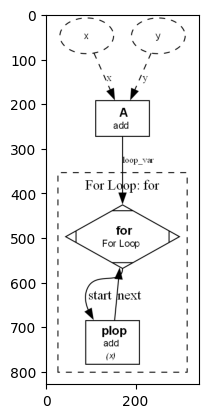

In [8]:
pipeline.to_dot("pipeline_example_for.dot", generate_png=True)
print("Fichier .dot et .png généré.")
plt.imshow(Image.open("pipeline_example_for.png"))